# Choosing ARIMA Orders


<div class="alert alert-info"><h3>Related Functions:</h3>
<tt>
<strong>
<a href='https://www.alkaline-ml.com/pmdarima/user_guide.html#user-guide'>pmdarima.auto_arima</a></strong><font color=black>(y[,start_p,d,start_q, …])</font>&nbsp;&nbsp;&nbsp;Returns the optimal order for an ARIMA model<br>

<h3>Optional Function (see note below):</h3>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.arma_order_select_ic.html'>stattools.arma_order_select_ic</a></strong><font color=black>(y[, max_ar, …])</font>&nbsp;&nbsp;Returns information criteria for many ARMA models<br><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.x13.x13_arima_select_order.html'>x13.x13_arima_select_order</a></strong><font color=black>(endog[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Perform automatic seasonal ARIMA order identification using x12/x13 ARIMA</tt></div>

## Perform standard imports and load datasets

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load a non-stationary dataset
df1 = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

<AxesSubplot:xlabel='Month'>

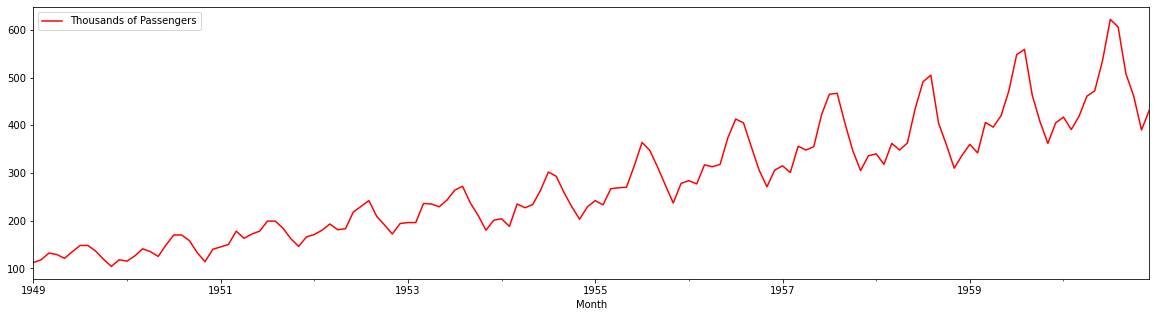

In [2]:
df1.plot(figsize = (20,5), color = "red")

<AxesSubplot:xlabel='Date'>

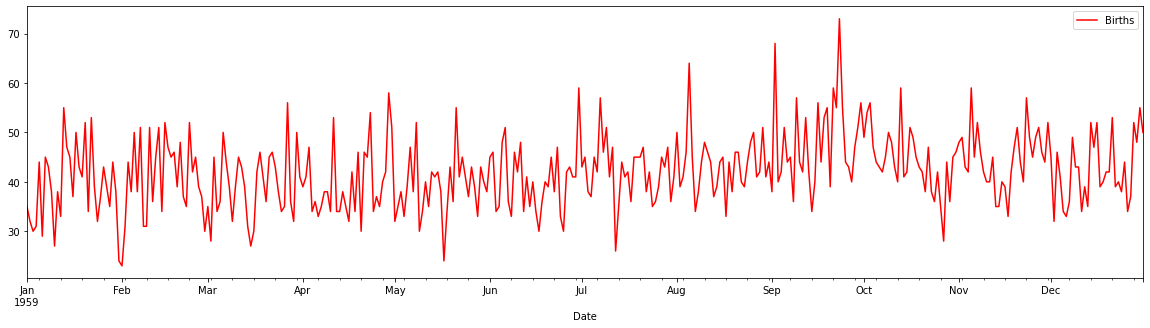

In [3]:
df2.plot(figsize = (20,5), color = "red")

In [4]:
df2

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


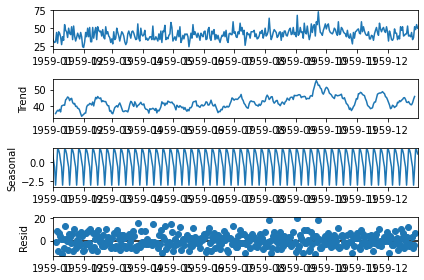

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

s_dec_additive = seasonal_decompose(df2, model = "additive")
s_dec_additive.plot()
plt.show()

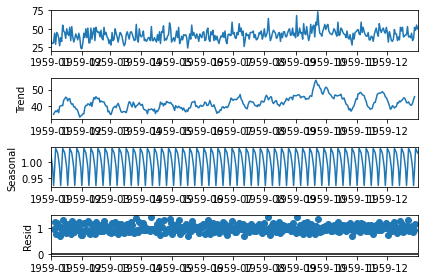

In [5]:
s_dec_additive = seasonal_decompose(df2, model = "multiplicative")
s_dec_additive.plot()
plt.show()

# vañor muy pequeño de la estacionalidad ....

In [6]:
df2.head()


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


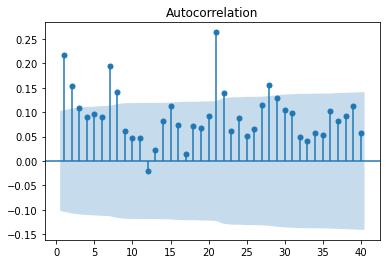

In [7]:
import statsmodels.graphics.tsaplots as sgt 


sgt.plot_acf(df2, zero = False, lags = 40)
plt.show()

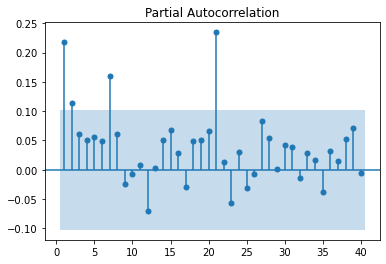

In [8]:
sgt.plot_pacf(df2, zero = False, lags = 40, method='ols')

plt.show()

## pmdarima Auto-ARIMA
This is a third-party tool separate from statsmodels. It should already be installed if you're using our virtual environment. If not, then at a terminal run:<br>
&nbsp;&nbsp;&nbsp;&nbsp;<tt>pip install pmdarima</tt>

In [10]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [11]:
help(auto_arima)

#ojo que empieza en 2 ... eso nos hace perder los de ordenes pequeños y modelos sencillos
# por defecto aplica algortimos para diferencias


Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=True, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The auto-ARIMA process seeks to identify the most optimal
    parameters for an ``ARIMA`` model, settling on a single fitted ARIMA model.
    This process is based on the commonly-used R function,
    ``forecast::auto.arima`` [3].


Let's look first at the stationary, non-seasonal <strong>Daily Female Births</strong> dataset:

In [12]:
model= auto_arima(df2['Births'], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2462.913, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2650.760, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2565.234, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.584, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2648.768, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2461.271, Time=0.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2460.154, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2460.722, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2536.154, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2459.074, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2462.221, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2563.261, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2460.367, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

<div class="alert alert-info"><strong>NOTE: </strong>Harmless warnings should have been suppressed, but if you see an error citing unusual behavior you can suppress this message by passing <font color=black><tt>error_action='ignore'</tt></font> into <tt>auto_arima()</tt>. Also, <font color=black><tt>auto_arima().summary()</tt></font> provides a nicely formatted summary table.</div>

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.537
Date:                Thu, 12 May 2022   AIC                           2459.074
Time:                        14:09:46   BIC                           2470.766
Sample:                             0   HQIC                          2463.721
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1252      0.060      2.097      0.036       0.008       0.242
ma.L1         -0.9624      0.017    -56.429      0.000      -0.996      -0.929
sigma2        49.1512      3.250     15.122      0.000      42.781      55.522
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                25.33
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.57
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This shows a recommended (p,d,q) ARIMA Order of (1,1,1), with no seasonal_order component.

We can see how this was determined by looking at the stepwise results. The recommended order is the one with the lowest <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> or AIC score. Note that the recommended model may <em>not</em> be the one with the closest fit. The AIC score takes complexity into account, and tries to identify the best <em>forecasting</em> model.

In [13]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=7, max_q=8, m=12,
                          trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

#m es incorrecto .... no es 12 ... parece indicar 7 la descomposicion

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2652.902, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2650.760, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2564.802, Time=0.60 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2458.995, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2648.768, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2463.584, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=2460.995, Time=0.89 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2460.995, Time=2.13 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=2459.165, Time=0.48 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2462.591, Time=5.01 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=2651.275, Time=0.58 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=2457.649, Time=1.54 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2460.154, Time=0.50 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=2459.607, Time=2.35 sec
 ARIMA(1,1,1)(0,0,2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  365
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1224.165
Date:                             Tue, 17 May 2022   AIC                           2456.330
Time:                                     12:52:58   BIC                           2471.919
Sample:                                          0   HQIC                          2462.526
                                             - 365                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1043      0.060      1.736      0.083      -0.013       0.222
ma.L1         -0.9544      0.019    -50.429      0.000      -0.991      -0.917
ar.S.L12      -0.1192      0.051     -2.327      0.020      -0.220      -0.019
sigma2        48.4909      3.247     14.935      0.000      42.127      54.855
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                25.08
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.58
Prob(H) (two-sided):                  0.72   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=7, max_q=8, m=7,
                          trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=2647.472, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2650.760, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2561.241, Time=0.27 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2460.771, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2648.768, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=2463.584, Time=0.16 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2459.112, Time=0.85 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=2461.209, Time=0.41 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=2.53 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=2461.111, Time=1.93 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=2461.612, Time=1.05 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=2462.985, Time=0.71 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=3.01 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=2455.510, Time=1.36 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  365
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 7)   Log Likelihood               -1218.332
Date:                           Tue, 17 May 2022   AIC                           2452.664
Time:                                   12:57:56   BIC                           2483.841
Sample:                                        0   HQIC                          2465.055
                                           - 365                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6390      0.269      2.376      0.017       0.112       1.166
ma.L1         -1.4956      0.300     -4.978      0.000      -2.084      -0.907
ma.L2          0.5037      0.293      1.719      0.086      -0.070       1.078
ar.S.L7        0.0214      0.193      0.111      0.912      -0.357       0.400
ar.S.L14       0.7511      0.124      6.064      0.000       0.508       0.994
ma.S.L7        0.1271      0.197      0.645      0.519      -0.259       0.513
ma.S.L14      -0.7309      0.129     -5.655      0.000      -0.984      -0.478
sigma2        46.8647      3.310     14.157      0.000      40.377      53.353
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                16.88
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.50
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

___
Now let's look at the non-stationary, seasonal <strong>Airline Passengers</strong> dataset:

In [25]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], trace=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Thu, 12 May 2022   AIC                           1365.825
Time:                        14:15:34   BIC                           1389.528
Sample:                             0   HQIC                          1375.457
                                - 144                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1730     85.616      8.458      0.000     556.369     891.977
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], trace=True, m=12)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=2.08 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.27 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=1.13 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.35 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=1.10 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.16 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.35 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.94 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.86 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=1.82 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.10 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.08 sec
 ARIMA(3,1,1)(0,1,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Thu, 12 May 2022   AIC                           1017.847
Time:                                     14:16:31   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3123     14.556      8.884      0.000     100.783     157.842
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

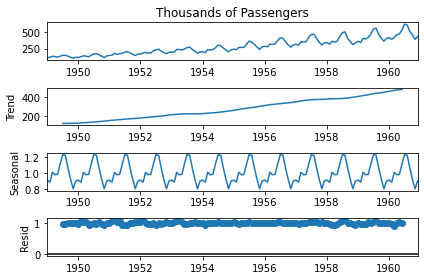

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

s_dec_additive = seasonal_decompose(df1['Thousands of Passengers'], model = "multiplicative")
s_dec_additive.plot()
plt.show()

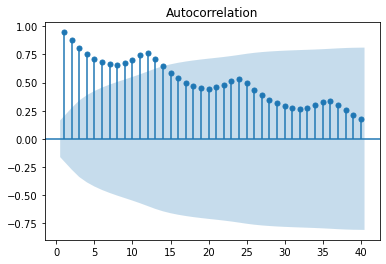

In [17]:
import statsmodels.graphics.tsaplots as sgt 


sgt.plot_acf(df1['Thousands of Passengers'], zero = False, lags = 40)
plt.show()

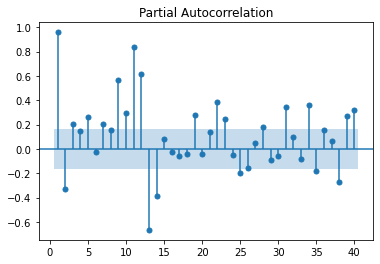

In [19]:
sgt.plot_pacf(df1['Thousands of Passengers'], zero = False, lags = 40, method='ols')

plt.show()

### Pasajeros

In [7]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=1, start_q=1,
                          max_p=3,  max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          #error_action='ignore',   # we don't want to know if an order does not work
                          #suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.44 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=3.40 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.69 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.29 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.55 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.76 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.46 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.92 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Thu, 12 May 2022   AIC                           1019.178
Time:                                     13:34:43   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=1, start_q=1,
                          max_p=12, max_q=15, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          #error_action='ignore',   # we don't want to know if an order does not work
                          #suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.37 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.72 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.00 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.80 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.51 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.03 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.75 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.79 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.29 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=8.05 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 17 May 2022   AIC                           1019.178
Time:                                     13:03:29   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## OPTIONAL: statsmodels ARMA_Order_Select_IC
Statsmodels has a selection tool to find orders for ARMA models on stationary data.

In [30]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [31]:
help(arma_order_select_ic)

# solo si es estacionario
# Dict-like object with attribute access. Each ic is an attribute with a DataFrame for the results. 
#The AR order used is the row index. The ma order used is the column index. 
#The minimum orders are available as ic_min_order.

Help on function arma_order_select_ic in module statsmodels.tsa.stattools:

arma_order_select_ic(y, max_ar=4, max_ma=2, ic='bic', trend='c', model_kw=None, fit_kw=None)
    Compute information criteria for many ARMA models.
    
    Parameters
    ----------
    y : array_like
        Array of time-series data.
    max_ar : int
        Maximum number of AR lags to use. Default 4.
    max_ma : int
        Maximum number of MA lags to use. Default 2.
    ic : str, list
        Information criteria to report. Either a single string or a list
        of different criteria is possible.
    trend : str
        The trend to use when fitting the ARMA models.
    model_kw : dict
        Keyword arguments to be passed to the ``ARMA`` model.
    fit_kw : dict
        Keyword arguments to be passed to ``ARMA.fit``.
    
    Returns
    -------
    Bunch
        Dict-like object with attribute access. Each ic is an attribute with a
        DataFrame for the results. The AR order used is the row ind

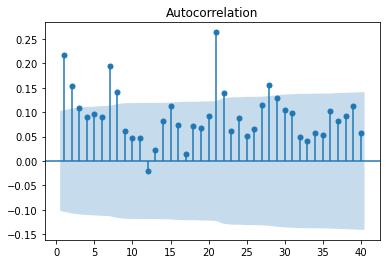

In [32]:
import statsmodels.graphics.tsaplots as sgt 


sgt.plot_acf(df2['Births'], zero = False, lags = 40)
plt.show()

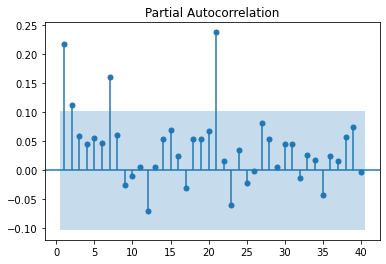

In [33]:

sgt.plot_pacf(df2['Births'], zero = False, lags = 40)
plt.show()

In [34]:
arma_order_select_ic(df2['Births'],ic='aic') # no tiene seasonal asi que puede dar lo mismo ....

{'aic':              0            1            2
 0  2494.781871  2482.539135  2479.131936
 1  2479.080614  2468.905797  2466.724037
 2  2476.363644  2466.283266  2467.697829
 3  2476.999131  2467.662180  2469.661897
 4  2478.092507  2476.713344  2467.130565,
 'aic_min_order': (2, 1)}

In [36]:
# ACF y PACF indican como siempre los retrasos para MA y AR los maximos considerados

arma_order_select_ic(df2['Births'],ic='aic',max_ar=7, max_ma=8) # no tiene seasonal asi que puede dar lo mismo ....

{'aic':              0            1            2            3            4  \
 0  2494.781871  2482.539135  2479.131936  2478.938846  2480.102758   
 1  2479.080614  2468.905797  2466.724037  2467.698497  2469.639821   
 2  2476.363644  2466.283266  2467.697829  2466.711360  2467.064956   
 3  2476.999131  2467.662180  2469.661897  2468.416357  2479.969709   
 4  2478.092507  2476.713344  2467.130565  2470.219144  2471.608538   
 5  2478.970754  2480.863096  2469.020607  2471.353192  2469.002955   
 6  2480.138664  2473.630361  2471.003525  2473.240945  2470.819909   
 7  2472.778263  2473.821612  2475.378559  2475.355534  2473.864085   
 
              5            6            7            8  
 0  2481.726573  2483.707704  2476.946721  2474.631798  
 1  2471.636368  2473.606959  2474.858735  2472.552355  
 2  2469.059873  2470.973504  2472.713934  2474.461930  
 3  2472.578806  2475.235388  2477.205319  2479.151838  
 4  2469.709270  2479.108701  2479.702117  2481.594400  
 5  2464.7

In [12]:
df2['ret_births'] = df2.Births.pct_change(1)*100

In [17]:
arma_order_select_ic(df2.ret_births[1:], ic='aic') # sino es bic - para poder ocmparar con autoarima

{'aic':              0            1            2
 0  3305.929009  3178.508786  3178.562685
 1  3231.685241  3178.391091  3180.220080
 2  3209.219461  3180.151725  3182.142134
 3  3199.399347  3182.124331  3183.985337
 4  3193.790545  3183.834423  3182.289856,
 'aic_min_order': (1, 1)}

In [11]:
arma_order_select_ic(df1['Thousands of Passengers']) # al tener componente S este sale distinto al compararlo con ARMA

{'bic':              0            1            2
 0  1796.307207  1627.771967  1534.002384
 1  1437.088819  1421.627524  1425.899321
 2  1425.518037  1423.098290          NaN
 3  1425.191373          NaN  1400.744437
 4  1427.576572          NaN  1414.310652, 'bic_min_order': (3, 2)}

In [18]:
df1['ret_pass'] = df1['Thousands of Passengers'].pct_change(1)*100

In [19]:
arma_order_select_ic(df1['Thousands of Passengers'][1:], ic='aic') # sino es bic

{'aic':              0            1            2
 0  1776.963067  1606.373159  1537.610684
 1  1419.195155  1400.966932  1402.263917
 2  1404.805200  1399.407431  1401.354150
 3  1401.595588  1427.719832  1368.880775
 4  1401.047445  1500.221405          NaN,
 'aic_min_order': (3, 2)}